In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [2]:
# Specify the path to your pickle file
file_path = "../../../dataset/cri_compustat_merged_v8.pkl"

# Open the pickle file for reading
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    df_full = pickle.load(file)

In [3]:
subsample_default_0 = df_full[df_full['Default'] == 0].sample(frac=0.4)
subsample_default_1 = df_full[df_full['Default'] == 1]
df = pd.concat([subsample_default_0, subsample_default_1])
df = df.sample(frac=1)
df.sort_values(by='date', inplace=True)

In [4]:
df.describe()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
count,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,...,4.773590e+05,477359.000000,477359.000000,477359.000000,477359.000000,4.773590e+05,4.773590e+05,4.773590e+05,477359.000000,477359.000000
mean,39261.558066,2009.177583,6.503405,0.052014,-0.003952,4.150451,-0.041788,0.652824,-0.014804,-0.004708,...,-1.777392e+04,1.178276,57.698811,0.227022,-1.633124,-5.374410e+04,-8.698899e+05,-8.555543e+05,-21783.882965,-18452.452832
std,11403.339530,6.411614,3.419058,0.179066,0.007666,2.993948,1.226481,0.832263,0.293203,0.036626,...,2.586437e+06,332.536868,421.023323,3.139427,52.908640,5.270235e+05,4.274523e+06,4.236227e+06,52610.531306,71838.031634
min,22043.000000,2000.000000,1.000000,-0.545579,-0.012097,-1.113511,-35.341088,-4.156714,-2.559415,-1.324832,...,-2.711250e+07,-64030.374242,-66666.666667,-225.000000,-1149.000000,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
25%,30450.000000,2004.000000,4.000000,-0.054010,-0.010955,2.120833,-0.616458,0.000000,-0.085900,-0.003729,...,0.000000e+00,0.009436,-10.833333,0.000000,0.804486,1.932918e+01,-7.885474e+01,-7.382567e+01,-3.839886,0.162180
50%,37356.000000,2008.000000,6.000000,0.082999,-0.006739,3.597517,-0.023383,0.540976,0.000000,0.001685,...,1.036703e+02,0.567769,42.627119,0.000000,1.000000,3.534019e+01,-5.455753e+01,-4.838710e+01,-0.604010,4.054795
75%,46033.000000,2014.000000,9.000000,0.148992,0.001841,5.567407,0.565369,1.113299,0.063659,0.005489,...,2.443487e+02,1.448043,89.272727,0.195312,1.000000,5.462415e+01,-2.579450e+01,-1.513165e+01,-0.095958,12.798203
max,127028.000000,2023.000000,12.000000,0.713380,0.013861,114.654533,14.933724,4.787727,2.683886,0.216094,...,9.736054e+08,109677.200000,41375.000000,765.000000,226.000000,8.017000e+05,1.603300e+06,1.582700e+06,5576.666667,132673.500000


In [5]:
print(df.columns.tolist())

print(len(df. index))

['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic', 'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets', 'asset_turnover', 'inventory_turnover', 'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding', 'working_capital_turnover', 'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio', 'operating_profit_margin', 'ebitda_margin', 'debt_service_coverage_ratio', 'interest_coverage_ratio']
477359


In [6]:
print(df.shape)
df.sort_values(by='date', inplace=True)
df['Duration'] = df['Duration'].dt.total_seconds() / (24 * 60 * 60)
df.head()

(477359, 52)


,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
903,47024,2000.0,1,0.089239,0.011089,2.893726,-0.399543,1.149188,-0.382007,-0.089303,...,0.000000,0.311091,-1.400862,-0.000000,1.000000,71.251898,-116.454762,-4.482534,-11.415142,-15.447371
3328,41517,2000.0,1,0.089239,0.011089,1.416041,-0.425183,0.000000,0.000000,0.000499,...,1509.989956,-2.590882,37.063953,0.000000,1.000000,51.539837,-27.176966,-14.519993,-0.032901,3.242347
1094,30552,2000.0,1,0.089239,0.011089,2.429536,0.500595,0.444371,-0.126110,0.012161,...,17.755461,2.272872,4.411765,0.000000,1.000000,49.263060,-13.218284,-2.350746,-0.124037,16.349593
5282,38120,2000.0,1,0.089239,0.011089,1.283876,-0.250585,0.250128,-0.013457,0.001909,...,211.273204,3.389492,30.000000,0.000000,1.000000,17.489512,-68.969890,-63.150473,-0.277156,2.469479
6506,27884,2000.0,1,0.089239,0.011089,2.343106,2.307433,0.308481,-0.033569,0.001943,...,20.049207,26.088973,38.541667,0.495833,0.504167,1.347526,-97.304948,-96.089194,-2.019931,1.449422


In [7]:
df.describe()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
count,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,477359.000000,...,4.773590e+05,477359.000000,477359.000000,477359.000000,477359.000000,4.773590e+05,4.773590e+05,4.773590e+05,477359.000000,477359.000000
mean,39261.558066,2009.177583,6.503405,0.052014,-0.003952,4.150451,-0.041788,0.652824,-0.014804,-0.004708,...,-1.777392e+04,1.178276,57.698811,0.227022,-1.633124,-5.374410e+04,-8.698899e+05,-8.555543e+05,-21783.882965,-18452.452832
std,11403.339530,6.411614,3.419058,0.179066,0.007666,2.993948,1.226481,0.832263,0.293203,0.036626,...,2.586437e+06,332.536868,421.023323,3.139427,52.908640,5.270235e+05,4.274523e+06,4.236227e+06,52610.531306,71838.031634
min,22043.000000,2000.000000,1.000000,-0.545579,-0.012097,-1.113511,-35.341088,-4.156714,-2.559415,-1.324832,...,-2.711250e+07,-64030.374242,-66666.666667,-225.000000,-1149.000000,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
25%,30450.000000,2004.000000,4.000000,-0.054010,-0.010955,2.120833,-0.616458,0.000000,-0.085900,-0.003729,...,0.000000e+00,0.009436,-10.833333,0.000000,0.804486,1.932918e+01,-7.885474e+01,-7.382567e+01,-3.839886,0.162180
50%,37356.000000,2008.000000,6.000000,0.082999,-0.006739,3.597517,-0.023383,0.540976,0.000000,0.001685,...,1.036703e+02,0.567769,42.627119,0.000000,1.000000,3.534019e+01,-5.455753e+01,-4.838710e+01,-0.604010,4.054795
75%,46033.000000,2014.000000,9.000000,0.148992,0.001841,5.567407,0.565369,1.113299,0.063659,0.005489,...,2.443487e+02,1.448043,89.272727,0.195312,1.000000,5.462415e+01,-2.579450e+01,-1.513165e+01,-0.095958,12.798203
max,127028.000000,2023.000000,12.000000,0.713380,0.013861,114.654533,14.933724,4.787727,2.683886,0.216094,...,9.736054e+08,109677.200000,41375.000000,765.000000,226.000000,8.017000e+05,1.603300e+06,1.582700e+06,5576.666667,132673.500000


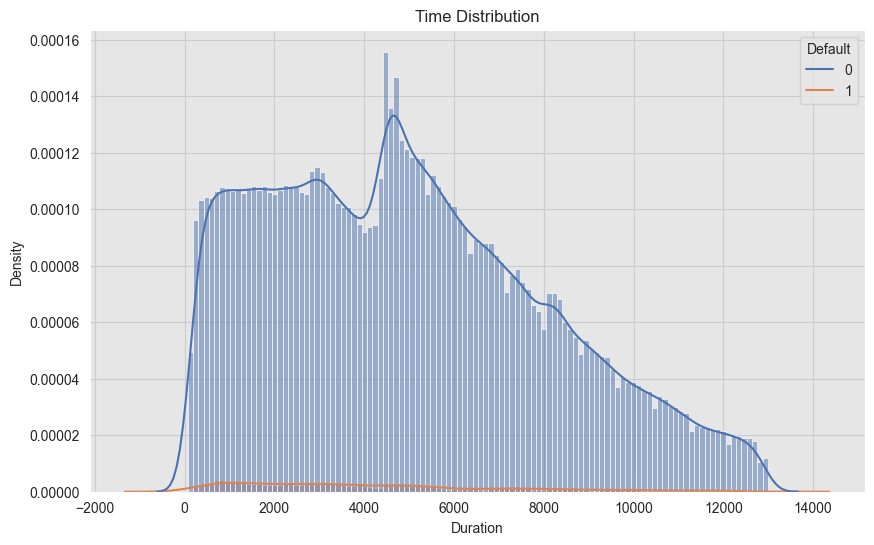

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram with the 'EventType' hue
sns.histplot(data=df, x='Duration', hue='Default', stat='density', ax=ax)

# Create the KDE plot with the 'EventType' hue
sns.kdeplot(data=df, x='Duration', hue='Default', fill=False, ax=ax)

# Set the title
ax.set_title('Time Distribution')

# Show the plot
plt.show()


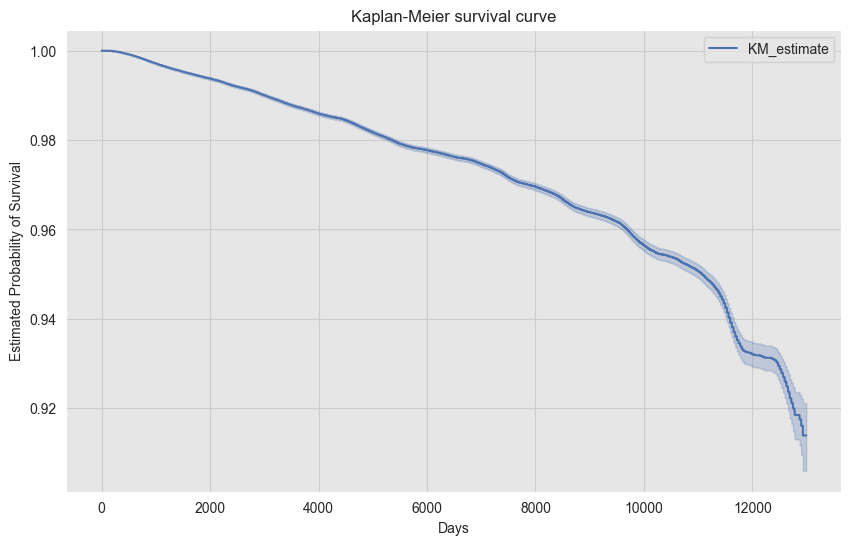

In [9]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(durations=df['Duration'], event_observed=df['Default'])

fig, ax =  plt.subplots()
kmf.plot_survival_function(color='C0',ax=ax)
ax.set(
    title='Kaplan-Meier survival curve',
    xlabel='Days',
    ylabel='Estimated Probability of Survival'
);

In [10]:
df.columns

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'Default', 'day',
       'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic',
       'current_ratio', 'quick_ratio', 'cash_ratio', 'net_working_capital',
       'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio',
       'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets',
       'asset_turnover', 'inventory_turnover', 'days_in_inventory',
       'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio'],
      dtype='object')

C:\Users\Melissa\AppData\Local\Temp\ipykernel_19620\3746533019.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


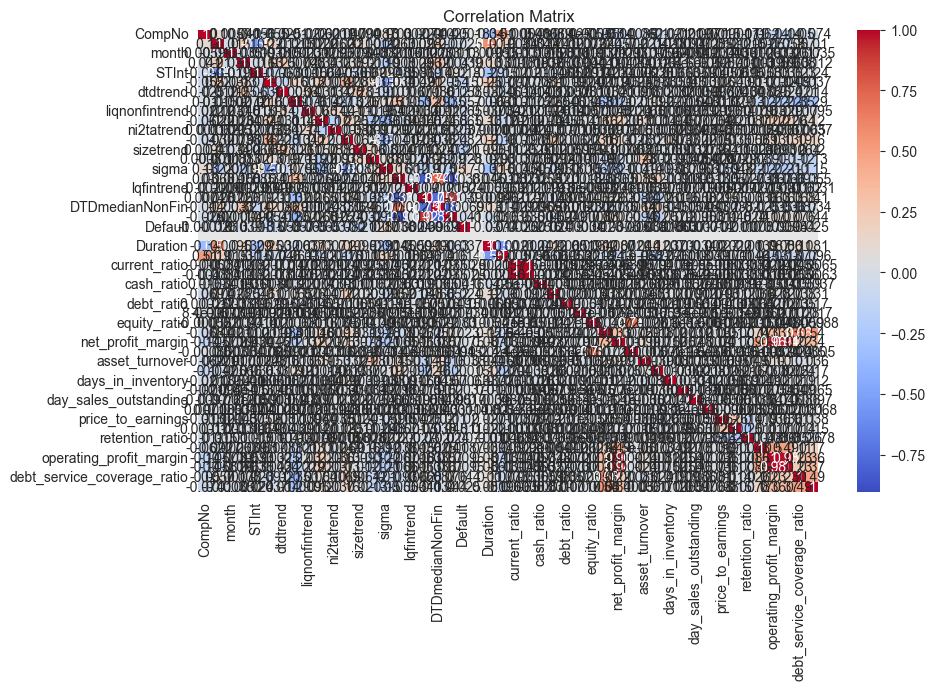

In [11]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Print pairs of features with correlations above 0.9
threshold = 0.9
correlation_pairs = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
            correlation_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

if correlation_pairs:
    print("Correlations above 0.9:")
    for col1, col2, corr in correlation_pairs:
        print(f"Columns {col1} and {col2} have a correlation of {corr}")
else:
    print("No correlations above 0.9 found.")


Correlations above 0.9:
Columns liqfinlevel and dummy297fin have a correlation of -0.9017369064043241
Columns DTDmedianFin and dummy297fin have a correlation of 0.9153431413166959
Columns dummy297fin and liqfinlevel have a correlation of -0.9017369064043241
Columns dummy297fin and DTDmedianFin have a correlation of 0.9153431413166959
Columns current_ratio and quick_ratio have a correlation of 0.9999956983489199
Columns quick_ratio and current_ratio have a correlation of 0.9999956983489199
Columns net_profit_margin and operating_profit_margin have a correlation of 0.9620483265425287
Columns net_profit_margin and ebitda_margin have a correlation of 0.9441066945878313
Columns operating_profit_margin and net_profit_margin have a correlation of 0.9620483265425287
Columns operating_profit_margin and ebitda_margin have a correlation of 0.9806966614592161
Columns ebitda_margin and net_profit_margin have a correlation of 0.9441066945878313
Columns ebitda_margin and operating_profit_margin have 

In [13]:
df.drop(["quick_ratio", "operating_profit_margin", "ebitda_margin", "dummy297fin", "DTDmedianNonFin"], axis=1, inplace=True)


In [14]:
correlation_matrix = df.corr()
threshold = 0.9
correlation_pairs = []
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold:
            correlation_pairs.append((col1, col2, correlation_matrix.loc[col1, col2]))

if correlation_pairs:
    print("Correlations above 0.9:")
    for col1, col2, corr in correlation_pairs:
        print(f"Columns {col1} and {col2} have a correlation of {corr}")
else:
    print("No correlations above 0.9 found.")

C:\Users\Melissa\AppData\Local\Temp\ipykernel_19620\2549217585.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


No correlations above 0.9 found.


In [15]:
print(df.columns.tolist())

print(len(df. index))

['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin', 'Default', 'day', 'date', 'StartDate', 'EventDate', 'Duration', 'gvkey', 'tic', 'current_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets', 'asset_turnover', 'inventory_turnover', 'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding', 'working_capital_turnover', 'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio', 'debt_service_coverage_ratio', 'interest_coverage_ratio']
477359


In [16]:
df.drop(["year", "month", "gvkey", "StartDate", "EventDate", "tic", "day"], axis=1, inplace=True)


In [17]:
from datetime import datetime

date2022 = datetime(2022, 1, 1)
train_df = df[df["date"] < date2022]
test_df = df[df["date"] >= date2022]
print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)

train_df shape: (462703, 40)
test_df shape: (14656, 40)


In [18]:
test_df.groupby('Default')["CompNo"].count()

Default
0    14500
1      156
Name: CompNo, dtype: int64

In [19]:
156/(36381+156)

0.004269644469989326

In [20]:
val_date = datetime(2020, 1, 1)

val_df = train_df[train_df["date"] >= val_date]
train_df = train_df[train_df["date"] < val_date]
print("train_df shape:", train_df.shape)
print("val_df shape:", val_df.shape)

train_df shape: (439010, 40)
val_df shape: (23693, 40)


In [21]:
train_df.groupby("Default")["CompNo"].count()

Default
0    430160
1      8850
Name: CompNo, dtype: int64

In [22]:
8850/(1075728+8850)

0.008159855722686613

In [23]:
val_df.groupby('Default')["CompNo"].count()

Default
0    23377
1      316
Name: CompNo, dtype: int64

In [24]:
316/(57983+316)

0.005420333110344946

In [25]:
print(train_df.columns)


Index(['CompNo', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel',
       'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend',
       'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin', 'Default',
       'date', 'Duration', 'current_ratio', 'cash_ratio',
       'net_working_capital', 'debt_ratio', 'debt_to_equity_ratio',
       'equity_ratio', 'cashflow_to_debt_ratio', 'net_profit_margin',
       'return_on_assets', 'asset_turnover', 'inventory_turnover',
       'days_in_inventory', 'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'debt_service_coverage_ratio', 'interest_coverage_ratio'],
      dtype='object')


In [26]:
train_df.drop(["CompNo", "date"], axis=1, inplace=True)
val_df.drop(["CompNo", "date"], axis=1, inplace=True)
test_df.drop(["CompNo", "date"], axis=1, inplace=True)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_19620\3108148843.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(["CompNo", "date"], axis=1, inplace=True)


In [27]:
train_df.head()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,days_in_inventory,receivables_turnover,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,debt_service_coverage_ratio,interest_coverage_ratio
903,0.089239,0.011089,2.893726,-0.399543,1.149188,-0.382007,-0.089303,-0.015166,2.450683,0.599191,...,0.000000,-157.592454,0.000000,0.311091,-1.400862,-0.000000,1.000000,71.251898,-11.415142,-15.447371
3328,0.089239,0.011089,1.416041,-0.425183,0.000000,0.000000,0.000499,0.000058,0.175070,-0.215849,...,1312.400195,0.131266,1509.989956,-2.590882,37.063953,0.000000,1.000000,51.539837,-0.032901,3.242347
1094,0.089239,0.011089,2.429536,0.500595,0.444371,-0.126110,0.012161,-0.003077,-0.823732,0.546414,...,912.092376,20.818769,17.755461,2.272872,4.411765,0.000000,1.000000,49.263060,-0.124037,16.349593
5282,0.089239,0.011089,1.283876,-0.250585,0.250128,-0.013457,0.001909,-0.000226,0.973433,-0.367151,...,399262.767052,1.727621,211.273204,3.389492,30.000000,0.000000,1.000000,17.489512,-0.277156,2.469479
6506,0.089239,0.011089,2.343106,2.307433,0.308481,-0.033569,0.001943,-0.000396,1.542370,-0.163648,...,141905.579581,18.205209,20.049207,26.088973,38.541667,0.495833,0.504167,1.347526,-2.019931,1.449422


In [28]:
train_X = train_df
train_X.dropna(inplace=True)
val_X = val_df
val_X.dropna(inplace=True)
test_X = test_df
test_X.dropna(inplace=True)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_19620\890013741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X.dropna(inplace=True)


In [29]:
train_X.head()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,days_in_inventory,receivables_turnover,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,debt_service_coverage_ratio,interest_coverage_ratio
903,0.089239,0.011089,2.893726,-0.399543,1.149188,-0.382007,-0.089303,-0.015166,2.450683,0.599191,...,0.000000,-157.592454,0.000000,0.311091,-1.400862,-0.000000,1.000000,71.251898,-11.415142,-15.447371
3328,0.089239,0.011089,1.416041,-0.425183,0.000000,0.000000,0.000499,0.000058,0.175070,-0.215849,...,1312.400195,0.131266,1509.989956,-2.590882,37.063953,0.000000,1.000000,51.539837,-0.032901,3.242347
1094,0.089239,0.011089,2.429536,0.500595,0.444371,-0.126110,0.012161,-0.003077,-0.823732,0.546414,...,912.092376,20.818769,17.755461,2.272872,4.411765,0.000000,1.000000,49.263060,-0.124037,16.349593
5282,0.089239,0.011089,1.283876,-0.250585,0.250128,-0.013457,0.001909,-0.000226,0.973433,-0.367151,...,399262.767052,1.727621,211.273204,3.389492,30.000000,0.000000,1.000000,17.489512,-0.277156,2.469479
6506,0.089239,0.011089,2.343106,2.307433,0.308481,-0.033569,0.001943,-0.000396,1.542370,-0.163648,...,141905.579581,18.205209,20.049207,26.088973,38.541667,0.495833,0.504167,1.347526,-2.019931,1.449422


In [30]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Select only the numeric columns if necessary (VIF is not applicable to non-numeric columns)
numeric_columns = df.select_dtypes(include=[pd.np.number])

# Calculate VIF for the numeric columns
vif_result = calculate_vif(train_X)

# Convert the VIF result DataFrame to a list of lists
vif_result_list = vif_result.values.tolist()

print(vif_result_list)

C:\Users\Melissa\AppData\Local\Temp\ipykernel_19620\304942090.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  numeric_columns = df.select_dtypes(include=[pd.np.number])


[['StkIndx', 1.2169279002557372], ['STInt', 1.4163082855517368], ['dtdlevel', 3.9767106709600077], ['dtdtrend', 1.2195783228596369], ['liqnonfinlevel', 2.2617097790612952], ['liqnonfintrend', 1.067443260507126], ['ni2talevel', 1.3798634564985421], ['ni2tatrend', 1.0889039409143126], ['sizelevel', 1.61695164134524], ['sizetrend', 1.2254845011326188], ['m2b', 1.6796691810470992], ['sigma', 2.7114855962212205], ['liqfinlevel', 3.865107791479905], ['lqfintrend', 1.0038520759994558], ['DTDmedianFin', 4.0068659635378445], ['Default', 1.1098931827462195], ['Duration', 3.725381319928483], ['current_ratio', 1.0020035935937026], ['cash_ratio', 1.001444290703982], ['net_working_capital', 1.0953211656316282], ['debt_ratio', 1.012458952749542], ['debt_to_equity_ratio', 1.0000660491652698], ['equity_ratio', 2.0020995923814215], ['cashflow_to_debt_ratio', 2.3142085868091264], ['net_profit_margin', 1.6563990664936388], ['return_on_assets', 2.001471969111147], ['asset_turnover', 1.4867917728964926], ['

In [31]:
print(train_X.columns)

Index(['StkIndx', 'STInt', 'dtdlevel', 'dtdtrend', 'liqnonfinlevel',
       'liqnonfintrend', 'ni2talevel', 'ni2tatrend', 'sizelevel', 'sizetrend',
       'm2b', 'sigma', 'liqfinlevel', 'lqfintrend', 'DTDmedianFin', 'Default',
       'Duration', 'current_ratio', 'cash_ratio', 'net_working_capital',
       'debt_ratio', 'debt_to_equity_ratio', 'equity_ratio',
       'cashflow_to_debt_ratio', 'net_profit_margin', 'return_on_assets',
       'asset_turnover', 'inventory_turnover', 'days_in_inventory',
       'receivables_turnover', 'day_sales_outstanding',
       'working_capital_turnover', 'price_to_earnings',
       'dividend_payout_ratio', 'retention_ratio', 'gross_margin_ratio',
       'debt_service_coverage_ratio', 'interest_coverage_ratio'],
      dtype='object')


In [32]:
# # Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
from lifelines import CoxPHFitter
from sklearn.metrics import roc_auc_score, accuracy_score

cph_list = []
train_auc = []
val_auc = []

# cph = CoxPHFitter()   
# cph.fit(df_selected_features, duration_col="DaysDuration", event_col="EventType")
# cph.print_summary()   

step_size = [0.01, 0.05, 0.1, 0.2, 0.4]
penalizer = [0, 0.1, 0.5, 0.7]
l1_ratio = [0, 1.0]

cph = CoxPHFitter(penalizer=0.5, l1_ratio=1.0)
cph.fit(train_X, 'Duration', event_col='Default', fit_options={'step_size': 0.05})

available_keys = cph.baseline_hazard_['baseline hazard'].keys()
print("Available keys in 'baseline hazard' dictionary:", available_keys)

# baseline_haz = cph.baseline_hazard_['baseline hazard'][12.0]

c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['STInt'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Available keys in 'baseline hazard' dictionary: Float64Index([   71.0,    72.0,    74.0,    75.0,    76.0,    77.0,    78.0,
                 79.0,    80.0,    81.0,
              ...
              11641.0, 11647.0, 11651.0, 11652.0, 11653.0, 11655.0, 11656.0,
              11682.0, 11683.0, 11684.0],
             dtype='float64', length=11008)


In [34]:
# Fit the Cox Proportional-Hazards (CoxPH) model with the selected features
from lifelines import CoxPHFitter
from sklearn.metrics import roc_auc_score, accuracy_score

cph_list = []
train_auc = []
val_auc = []

# cph = CoxPHFitter()
# cph.fit(df_selected_features, duration_col="DaysDuration", event_col="EventType")
# cph.print_summary()   

step_size = [0.01, 0.05, 0.1]
penalizer = [0, 0.1, 0.5, 0.7]
l1_ratio = [0, 1.0]

for s in step_size:
    for p in penalizer:
        for l in l1_ratio:
            if l == 0:
                if p == 0:
                    cph = CoxPHFitter()
                else:
                    cph = CoxPHFitter(penalizer=p)
            else:
                cph = CoxPHFitter(penalizer=p, l1_ratio=l)

            cph.fit(train_X, 'Duration', event_col='Default', fit_options={'step_size': s})

            baseline_haz = cph.baseline_hazard_['baseline hazard'][365.0]
            x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
            x_pred = np.transpose(x_pred)
            train_auc.append(roc_auc_score(train_X['Default'], x_pred))
            val_x_pred = np.array(cph.predict_partial_hazard(val_X)) * baseline_haz
            val_x_pred = np.transpose(val_x_pred)
            val_auc.append(roc_auc_score(val_X['Default'], val_x_pred))

            cph_list.append({'cph': cph, 'step_size': s, 'penalizer': p, 'l1_ratio': l})
            

c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['STInt'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
c:\Users\Melissa\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column return_on_assets have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['Default'].astype(bool)
>>> print(df.loc[events, 'return_on_assets'].var())
>>> print(df.loc[~events, 'return_on_assets'].var())

A very low variance means that the column return_on_assets completely determines whether a subject dies or not. See htt

In [47]:
# Assuming you have a DataFrame named train_X

# Count how many rows have "Default" equal to 0
count_default_0 = (train_X['Default'] == 0).sum()

# Count how many rows have "Default" equal to 1
count_default_1 = (train_X['Default'] == 1).sum()

# Print the counts
print("Count of Default == 0:", count_default_0)
print("Count of Default == 1:", count_default_1)


Count of Default == 0: 430160
Count of Default == 1: 8850


In [48]:
m = max(train_auc)
print(m)
[i for i, j in enumerate(train_auc) if j == m]

0.9097861082303891


[8, 9]

In [49]:
m = max(val_auc)
print(m)
[i for i, j in enumerate(val_auc) if j == m]

0.9303471225368655


[8, 9]

In [50]:
cph_list[8]

{'cph': <lifelines.CoxPHFitter: fitted with 439010 total observations, 430160 right-censored observations>,
 'step_size': 0.05,
 'penalizer': 0,
 'l1_ratio': 0}

In [51]:
cph_list[9]

{'cph': <lifelines.CoxPHFitter: fitted with 439010 total observations, 430160 right-censored observations>,
 'step_size': 0.05,
 'penalizer': 0,
 'l1_ratio': 1.0}

In [52]:
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 439010 total observations, 430160 right-censored observations>
             duration col = 'Duration'
                event col = 'Default'
                penalizer = 0.7
                 l1 ratio = 1.0
      baseline estimation = breslow
   number of observations = 439010
number of events observed = 8850
   partial log-likelihood = -107643.36
         time fit was run = 2023-11-10 06:59:18 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
StkIndx                      -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
STInt                         0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
dtdlevel                     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
dtdtrend                     -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
liqnonfinlevel               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
liqnonfintrend               -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ni2talevel                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
ni2tatrend                   -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sizelevel                    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sizetrend                    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
m2b                          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
sigma                         0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
liqfinlevel                   0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
lqfintrend                    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DTDmedianFin                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
current_ratio                -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cash_ratio                    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_working_capital          -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
debt_ratio                    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
debt_to_equity_ratio          0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
equity_ratio                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
cashflow_to_debt_ratio        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
net_profit_margin            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
return_on_assets             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
asset_turnover               -0.00       1.00       0.00            -0.00             0.00            

In [53]:
x_pred = np.array(cph.predict_partial_hazard(train_X)) * baseline_haz
x_pred = np.transpose(x_pred)
x_pred.shape

(439010,)

In [54]:
roc_auc_score(train_df['Default'], x_pred)

0.9013997839721183

In [55]:
baseline_haz = cph.baseline_hazard_['baseline hazard'][365.0]
test_x_pred = np.array(cph.predict_partial_hazard(test_X)) * baseline_haz
test_x_pred = np.transpose(test_x_pred)
test_x_pred.shape

(14656,)

In [56]:
print(test_x_pred.min())
print(test_x_pred.max())


2.3373637368435466e-06
2.3373826610763744e-06


In [57]:
roc_auc_score(test_df['Default'], test_x_pred)


0.9361419098143237

In [58]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# Compute precision and recall values
precision, recall, _ = precision_recall_curve(test_df['Default'], test_x_pred)

# Calculate the area under the precision-recall curve (PRAUC)
prauc = auc(recall, precision)

print('PRAUC:', prauc)

ap = average_precision_score(test_df['Default'], test_x_pred)
print('average_precision_score', ap)


PRAUC: 0.10157308890201129
average_precision_score 0.10287720572322309
